<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Linear-Regression:-Model-Assumptions" data-toc-modified-id="Linear-Regression:-Model-Assumptions-1">Linear Regression: Model Assumptions</a></span></li><li><span><a href="#Import-packages" data-toc-modified-id="Import-packages-2">Import packages</a></span><ul class="toc-item"><li><span><a href="#2)-Load-Data" data-toc-modified-id="2)-Load-Data-2.1">2) Load Data</a></span></li></ul></li><li><span><a href="#Linear-Regression:-Check-Assumptions" data-toc-modified-id="Linear-Regression:-Check-Assumptions-3">Linear Regression: Check Assumptions</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Linearity" data-toc-modified-id="Linearity-3.0.1">Linearity</a></span></li></ul></li><li><span><a href="#Normality" data-toc-modified-id="Normality-3.1">Normality</a></span><ul class="toc-item"><li><span><a href="#Multicollinearity" data-toc-modified-id="Multicollinearity-3.1.1">Multicollinearity</a></span></li><li><span><a href="#No-autocorrelation" data-toc-modified-id="No-autocorrelation-3.1.2">No autocorrelation</a></span></li><li><span><a href="#Homoscedasticity" data-toc-modified-id="Homoscedasticity-3.1.3">Homoscedasticity</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-3.2">Summary</a></span></li></ul></li></ul></div>

# Linear Regression: Model Assumptions

<a href="https://drive.google.com/file/d/1EZ_xqMaYj77vErVnrQmnFOj-VBEoO5uW/view" target="_blank">
     <img src="http://www.deltanalytics.org/uploads/2/6/1/4/26140521/screen-shot-2019-01-05-at-4-48-29-pm_orig.png" width="500" height="400">
</a>

Linear Regression attempts to predict a continuous outcome feature (**Y**) from one or more explanatory features (**X**).  

$$Y = \beta_0 + \beta_1 X$$

$\beta_0$ is called the intercept term, and represents the expected mean value of Y when all explanatory features equal 0.  
$\beta_1$ is called a beta coefficient, and represents the expected change in the value of Y that results from a one unit change in X.  

Below is an example of a linear regression with only one explanatory feature. The red dots indicate the actual data, and the blue line represents the predicted **Y** values based on the provided **X** values.  $\beta_0$ appears to equals 0, and $\beta_1$ appears to equal 2.
<img src="./images/LinearRegression.png" alt="Go Find Missing Image" style="width: 500px;height=500"/>

In this lab, we will attempt to construct a linear regression in order to answer a question that Kiva borrowers may have: 

**What impacts the loan amount requested? **

To ensure that our linear regressor is appropriate and interpretable, we will have to confirm the following assumptions are not violated:

1. Linear relationship between x and y - We can draw a line or curve within the relationship
2. Normality - A normal curve, a histogram of the values should look like a bell
3. Minimal multicollinearity (if multiple variables) - Each variable should introduce **new** information
4. No autocorrelation - No relationship **within** a variable depending on the time/magnitude scale
5. Homoscedasticity - The variation in the error of the model should not be increasing as the variation in the data increases

- Additional rule of thumb: at least 20 observations per independent variable in the analysis
  
If these assumptions are violated, then the predictive power of the linear regression is still valid but the information concerning the most important features is not. It is important to keep this in mind!


Here's a look ahead at what we'll be doing in these series of notebooks: 

3.1 Load Data and Build Univariate Linear Regression

3.2 Check Assumptions  

3.3 Build Multivariate Linear Regression 

3.4 Polynomial Regression

3.5 Regularization



# Import packages
-----

In [1]:
# Generally useful data science packages
import numpy as np
import pandas as pd

# Plotting package
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 8)
sns.set()
sns.set(font_scale=1.5)

# We'll be using statsmodels to fit linear regression
import statsmodels.api as sm

# Packages for checking assumptions
from scipy import stats as stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer

# Set jupyter notebook preferences
# the command below means that the output of multiple commands in a cell will be output at once.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# the command below tells jupyter to display up to 100 columns, this keeps everything visible
pd.set_option('display.max_columns', 100)
pd.set_option('expand_frame_repr', True)

2) Load Data
---

In [3]:
# Load data

try: 
    # Local version
    path = "../data/"
    filename = 'loans.csv'
    df = pd.read_csv(path+filename)
except FileNotFoundError or ParserError: 
    # If not local, get from remote repp. Helpful if using colab.
    url = 'https://raw.githubusercontent.com/DeltaAnalytics/machine_learning_for_good_data/master/loans.csv'
    df = pd.read_csv(url)

In [4]:
pd.options.mode.chained_assignment = None  # default='warn'

# Define our dependent variable
y_column = 'loan_amount'
y = df[y_column]
# Define  our independent variables
x_columns = ['lender_count']
X = df[x_columns]
# Add an intercept term to the independent variables. This is needed in order to include the constant term from
# linear regression equation.
X['intercept'] = 1
# Split our data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model = sm.OLS(endog=y_train, exog=X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_amount   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                 2.059e+04
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:59:06   Log-Likelihood:                -40440.
No. Observations:                4815   AIC:                         8.088e+04
Df Residuals:                    4813   BIC:                         8.090e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
lender_count    31.2180      0.218    143.497   

-----
Linear Regression: Check Assumptions
=====

In order for linear regression to be an appropriate model, the following assumptions must be confirmed:

1. Linear relationship between x and y
1. Normality (not required, but good to have)
1. Minimal multicollinearity 
1. No autocorrelation
1. Homoscedasticity 

### Linearity
First, as the name implies, linear regression requires the underlying relationship between the independent (x) and dependent (y) variables to be linear. This means that a line drawn through the points can capture the relationship, with some degree of error. 

We must also be aware of outliers, which can throw off a linear relationship. 

The most straightforward check of linearity is to make scatter plots of the variables chosen.

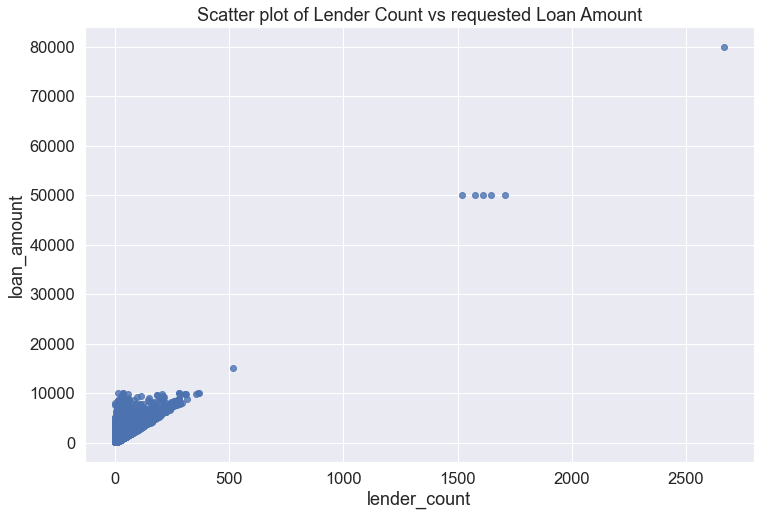

In [6]:
ax = sns.regplot(x=x_columns[0], y=y_column, data=df, fit_reg=False);
ax.set_title(f'Scatter plot of {x_columns[0].replace("_", " ").title()} vs requested {y_column.replace("_", " ").title()}');

What is the general trend?

Are there outliners?

-----
Normality
-----

Normality means the distribution of values falls into a normal distribution. 

The results summary printed above gives us an indication of whether or not our data is normally distributed. If the **Prob(JB)** number is less than 0.05, this means that we can reject the Null hypothesis that the data distribution is normal. If this is the case, we need to look into our model more closely see where this is coming from and how/if we can rectify the issue.

We can visualize the normality of the data by making histograms or Q-Q (quantile-quantile) plots.

First we will look at a histogram for the dependent variable, loan_amount. From this, we can see that the dependent variable is skewed to the left.

/Users/brian/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


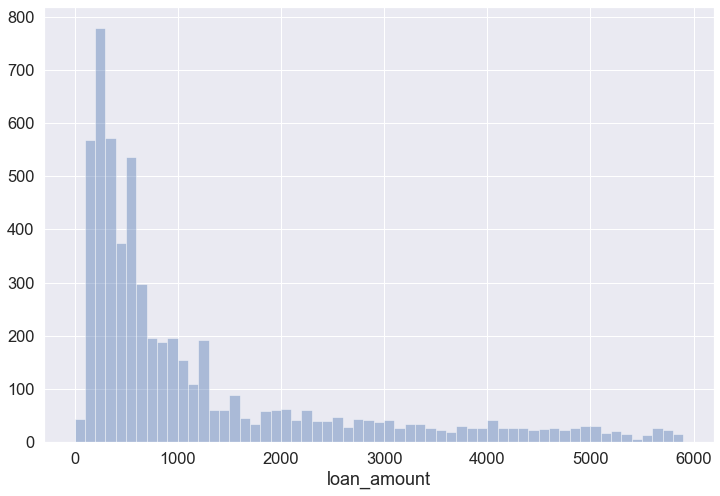

In [7]:
sns.distplot(df[df[y_column]<=6000][y_column], bins=range(0, 6000, 100), kde=False, norm_hist=False);

Furthermore, we can create a quantile-quantile plot to see how the distribution of data compares to that expected from a normal distribution. In these plots, the quantiles from the measured data are compared to that of a normal distribution and if the measured data is normal, we expect to see a straight line.

The plot below clearly shows that the dependent variable is not normal and therefore we need to investigate the skew further to see if the data required transformation. 

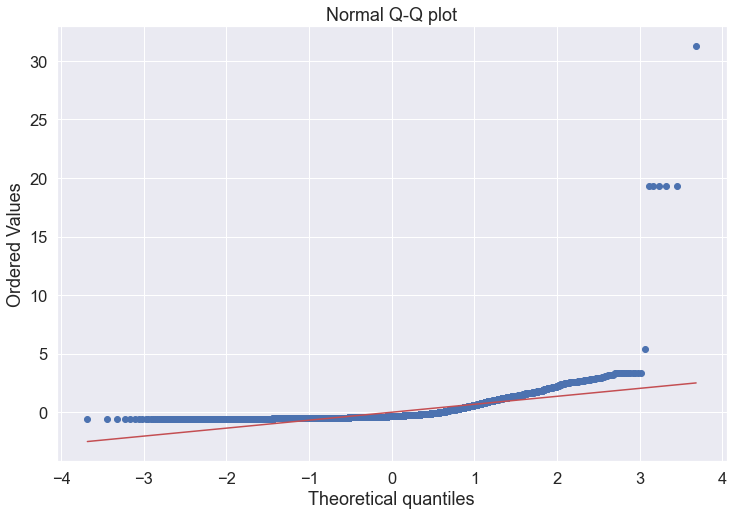

In [8]:
# Convert dependent variable to a numpy and standardise the data
y = np.asarray(df[y_column])
standardised_y = (y-np.mean(y))/np.std(y)
# create a normal Q-Q plot using the stats module probplot
plt.figure(figsize=(12,8))
stats.probplot(standardised_y, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show();

If a variable is not normal, it may be adjusted by a [non-linear transformation](https://stats.stackexchange.com/questions/298/in-linear-regression-when-is-it-appropriate-to-use-the-log-of-an-independent-va).

We already know our data is skewed by outliers, however before we begin modeling let's quantify the degree to which it is skewed.

[Scipy's stats package](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.stats.skew.html) allows you to conduct a skew test. A normally distributed dataset would return about 0. A skewness value of greater than 0 means there are more loans in the left tail of the distribution. Typically, a skew score of +-5 is deemed acceptable.


[Multivariate normality](https://en.wikipedia.org/wiki/Multivariate_normal_distribution) is a generalization of one-dimensional, or univariate, normality, to more dimensions. For a regression using multiple independent (x) variables, this means checking that all of the linear combinations of variables used are normal. 


In [9]:
print(f"{stats.skew(df[y_column], axis=None):.4}")

11.81


We can continue with the linear regression model for predicting the loan_amount however, we should be aware that our beta-coefficients may be __not__ be reliable due to the skewness of the data. 

__If you face a dataset with more severely skewed data, we describe a way to address this in the appendix below.__

### Multicollinearity

Multicollinearity is only applicable to multivariate regression, and means that two or more explanatory features are highly correlated. Think of these features as contributing the same information to the model, we aren't learning anything new having both of them versus only having one of them!

This makes it difficult for the model to try to differentiate between each feature's influence on the explanatory feature.

Again, the summary table from the linear regression can help us again. There is a statistic in the bottom right hand corner known as the **condition number**. This indicates the severity and impact of multicolinearity in the regression and as a rule fo thumb, values over 30 are an issue. 

One way to check this is by examining the correlation matrix and making sure none of the variables correlate to 1. Numpy's Corrcoef function returns a matrix of Pearson correlation coefficients. 

Read more about Numpy's Corrcoef [here](https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.corrcoef.html).

It would take a long time for us to test each and every relationship between two sets of variables, so let's create a correlation matrix that lets us visualize every correlation in a dataset using Pandas.

Keep in mind, strong correlations are both those that are close to +1 **and -1**!

In [10]:
df_corr_tbl = df[df.columns]
df_corr_tbl.corr()

,id_number,loan_amount,lender_count,funded_amount,repayment_term
id_number,1.000000,-0.099763,-0.131498,-0.138011,-0.087624
loan_amount,-0.099763,1.000000,0.904552,0.958558,-0.112723
lender_count,-0.131498,0.904552,1.000000,0.939418,-0.049583
funded_amount,-0.138011,0.958558,0.939418,1.000000,-0.100966
repayment_term,-0.087624,-0.112723,-0.049583,-0.100966,1.000000


In [11]:
for col in df.columns:
    print(col)

id_number
loan_amount
lender_count
status
funded_date
funded_amount
repayment_term
location_country_code
sector
description
use


Using the correlation table above, we can see that funded_amount is highly correlated with loan_amount and lender_count.  So to avoid multicollinearity, we probably do not want to include funded_amount in any multivariate regression model.

### No autocorrelation

A variable has autocorrelation when values in the series correlate with others in the same series, separated by a given interval.

In terms of the residuals, this means checking that residuals are independent.

A check for this is the **Durbin-Watson test**. The durbin-watson statistic ranges from 0 to 4 with values around 2 suggesting no autocorrelation. Values < 2 suggest positive correlation and values > 2 suggest negative correlation.

In the summary table above, the Durbin-Watson test has a value of approximately 2 so we can be happy that there is no autocorrelation.

### Homoscedasticity

Homoscedasticity is a statistical term that means that the spread of the residuals are equal across the regression line. This assumption means that the variance around the regression line is the same for all values of the predictor variable (X). 

Again, the summary table from the linear regression allows us to evaluate whether the model has homoscedasticity. If **Prob(Omnibus)** number is less than 0.05 we can reject the Null Hypothesis that the residuals are distributed uniformly and normally around zero.

In the case above, the Prob(Omnibus) is 0.00 which clearly indicates that the model does not have homoscedasticity.

This can be seen the plot below, the distribution of the residuals are not consistent across the range of data. When x is smaller, the residual is higher, and when x is larger, the residual is smaller.  Therefore, we need to work on our regression model more!

[Text(0.5, 0, 'X'), Text(0, 0.5, 'Residual')]

[(0.0, 10000.0)]

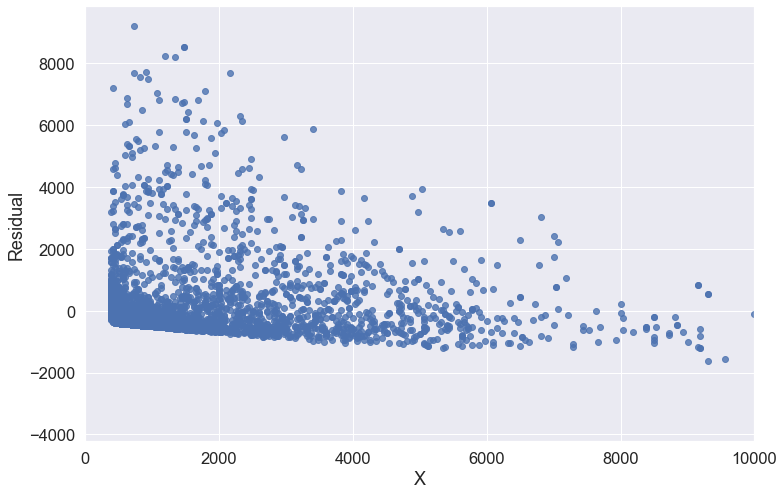

In [12]:
y_pred = model.predict(X_train)
ax = sns.regplot(x=y_pred, y=(y_train-y_pred), fit_reg=False)
ax.set(xlabel='X', ylabel='Residual')
ax.set(xlim=(0, 10000))

Summary
----

To recap the finding from the linear regression assumptions check above:

1. Linear relationship between x and y
  - For the independent variable 'lender_count', there is multi-trend linear relationship
1. Normality
  - The dependent variable data is not normally distributed and is left-hand skewed. 
1. Minimal multicollinearity 
  - There is multicollinearity between funded_amount and some other predictors, so we should keep that in mind when we     perform a multivariate regression.
1. No autocorrelation
  - Durbin-Watson test indicates no autocorrelation
1. Homoscedasticity 
  - With the single independent feature of lender_count, the model is not homoscedastic. We will build upon our model and try again.


<br>
<br> 
<br>

----